# Observations and Insights 

### 1. The drug becomes less and less effective as the weight of the mouse becomes heavier. The linear regression graph agrees with the conclusion because of the strong positive r-value correlation.

### 2. Capomulin and Ramicane were the most effective at decreasing tumor size. I would recommend using those two over Infubinol and Ceftamin.

### 3. The study is trustworthy and reliable. There are no outliers when investigating and refering to the boxplot graph.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)




# Combine the data into a single dataset
combine_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
# Display the data table for preview
combine_df.head()

In [2]:
# Checking the number of mice.
mice = combine_df["Mouse ID"].value_counts()
mice_total = len(mice)
mice_total

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combine_df.loc[combine_df.duplicated(subset=['Mouse ID', 'Timepoint',]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combine_df.loc[combine_df['Mouse ID'] ==  "g989", :]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combine_df[combine_df['Mouse ID'].isin(duplicate_mice)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df['Mouse ID'].value_counts()
clean_mice_number = len(clean_mice)
clean_mice_number

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_stat = clean_df.groupby(['Drug Regimen'])

regimen_mean = summary_stat['Tumor Volume (mm3)'].mean()
regimen_median = summary_stat['Tumor Volume (mm3)'].median()
regimen_variance = summary_stat['Tumor Volume (mm3)'].var()
regimen_std = summary_stat['Tumor Volume (mm3)'].std()
regimen_sem = summary_stat['Tumor Volume (mm3)'].sem()

summary_stat_df = pd.DataFrame({
                                "Mean": regimen_mean,
                                "Median": regimen_median,
                                "Variance": regimen_variance,
                                "Standard Deviation": regimen_std,
                                "Standard Error of Mean" : regimen_sem})

summary_stat_df

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', "median", "var", "std", "sem"])
summary_aggregation

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

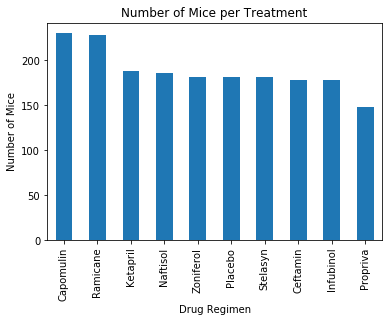

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_plot = clean_df['Drug Regimen'].value_counts().plot.bar()
bar_plot

plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

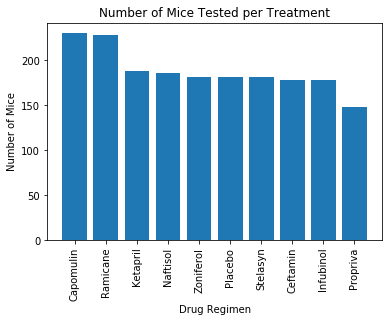

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = clean_df['Drug Regimen'].value_counts().index.values
y_axis = clean_df['Drug Regimen'].value_counts().values

plt.bar(x_axis, y_axis, align='center')

plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

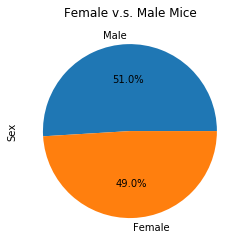

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pie_plot = clean_df['Sex'].value_counts().plot.pie(autopct='%1.1f%%')

plt.title("Female v.s. Male Mice")

pie_plot

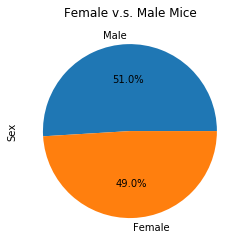

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# plt.pie(clean_df['Sex'].value_counts(), labels=clean_df['Sex'].value_counts().index.values, autopct='%1.1f%%')

plt.title("Female v.s. Male Mice")

plt.pie(clean_df['Sex'].value_counts(), labels=('Male', 'Female'), autopct='%1.1f%%')

plt.ylabel('Sex') 

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint_df = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max (Last) Timepoint'})
max_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

last_df = pd.merge(clean_df, max_timepoint_df, on='Mouse ID')

last_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max (Last) Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [14]:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatment_values = []

for treatment in treatments:
    
    temp_df = last_df.loc[last_df['Drug Regimen'] == treatment]


    final_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df["Max (Last) Timepoint"]]
    

    values = final_volume_df["Tumor Volume (mm3)"]
    treatment_values.append(values)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    med = quartiles[.5]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'Lower quartile for {treatment}: {lowerq}')
    print(f" ")
    print(f'Upper quartile for {treatment}: {upperq}')
    print(f" ")
    print(f'Median for {treatment}: {med}')
    print(f" ")
    print(f'IQR for {treatment}: {iqr}')
    print(f" ")
    

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {treatment}: {lower_bound}')
    print(f" ")
    print(f'Upper Bound for {treatment}: {upper_bound}')
    print(" ")
    
    # Outliers
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {treatment} outliers: {outliers_count}')
    print(f"---------------------------------------------------------------")
    

Lower quartile for Capomulin: 32.37735684
 
Upper quartile for Capomulin: 40.1592203
 
Median for Capomulin: 38.125164399999996
 
IQR for Capomulin: 7.781863460000004
 
Lower Bound for Capomulin: 20.70456164999999
 
Upper Bound for Capomulin: 51.83201549
 
Number of Capomulin outliers: 0
---------------------------------------------------------------
Lower quartile for Ramicane: 31.56046955
 
Upper quartile for Ramicane: 40.65900627
 
Median for Ramicane: 36.56165229
 
IQR for Ramicane: 9.098536719999998
 
Lower Bound for Ramicane: 17.912664470000003
 
Upper Bound for Ramicane: 54.30681135
 
Number of Ramicane outliers: 0
---------------------------------------------------------------
Lower quartile for Infubinol: 54.04860769
 
Upper quartile for Infubinol: 65.52574285
 
Median for Infubinol: 60.16518046
 
IQR for Infubinol: 11.477135160000003
 
Lower Bound for Infubinol: 36.83290494999999
 
Upper Bound for Infubinol: 82.74144559000001
 
Number of Infubinol outliers: 1
----------------

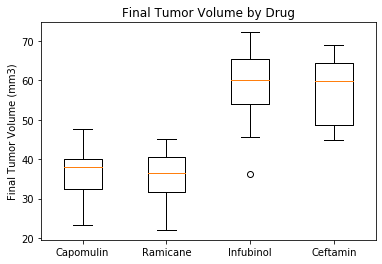

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Boxplot
plt.boxplot(treatment_values)


plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

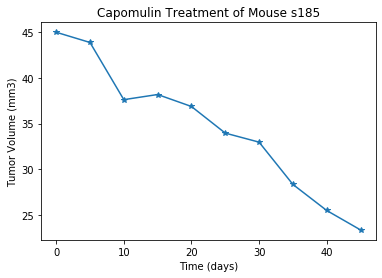

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = clean_df.loc[clean_df['Mouse ID'] == 's185']


plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = '*')


plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")


plt.show()

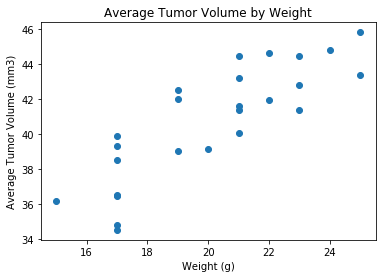

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']


average_volume_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'average_tumor_volume'})


average_volume_df = pd.merge(capomulin_df, average_volume_df, on='Mouse ID')
final_average_volume_df = average_volume_df[['Weight (g)', 'average_tumor_volume']].drop_duplicates()
final_average_volume_df

x = final_average_volume_df['Weight (g)']
y = final_average_volume_df['average_tumor_volume']


plt.scatter(x, y)


plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')


plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume for Capomulin is 0.84.


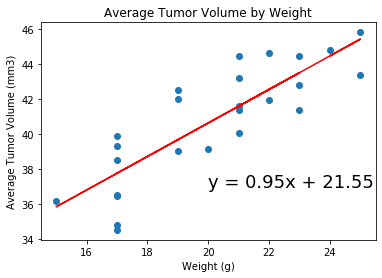

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

average_volume_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'average_tumor_volume'})

average_volume_df = pd.merge(capomulin_df, average_volume_df, on='Mouse ID')

final_average_volume_df = average_volume_df[['Weight (g)', 'average_tumor_volume']].drop_duplicates()

final_average_volume_df


x = final_average_volume_df['Weight (g)']
y = final_average_volume_df['average_tumor_volume']


correlation = st.pearsonr(x,y)


print(f"""The correlation between weight and average tumor volume for Capomulin is {round(correlation[0],2)}.""")



(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x,y)
plt.plot(x,regress_values,"r-")


plt.annotate(line_eq,(20,37),fontsize=18,color="black")


plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')


plt.show()